<a href="https://colab.research.google.com/github/nestasyssa/pytorch_nlp/blob/master/SeminaireIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support seminaire IA Dauphine

# 1. Les images: les afficher, les transformer


Importation les modules nécessaires de PyTorch.

In [18]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import datasets, transforms


## 1.1. Télécharger le fichier MNIST

In [19]:
# Chemin où vous voulez télécharger les données MNIST
data_path = './data'


# Définir une transformation pour convertir l'image en tenseur
transform = transforms.ToTensor()

# Téléchargement et chargement de l'ensemble de données MNIST
mnist_testset = datasets.MNIST(root=data_path, train=False, download=True, transform=transform)

# Accéder à une seule image et son étiquette
image, label = mnist_testset[0]

# Afficher la forme du tenseur d'image et l'étiquette
print("Image shape:", image.shape)
print("Label:", label)


Image shape: torch.Size([1, 28, 28])
Label: 7


## 1.2. Afficher une image

Pour afficher une image, importer `mathplotlib`

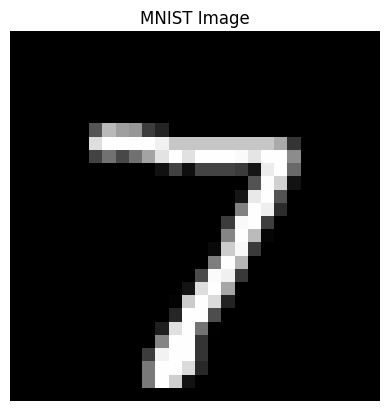

In [20]:
import matplotlib.pyplot as plt

# Afficher l'image
plt.imshow(image.squeeze(), cmap='gray')  # Utilisez la fonction squeeze() pour supprimer la dimension du canal si elle est de taille 1
plt.title('MNIST Image')
plt.axis('off')  # Désactive les axes
plt.show()




## 1.3 Convertir le tenseur en image et l'enregister

In [21]:
# Convertir le tenseur en une image PIL
image_pil = transforms.ToPILImage()(image)

# Enregistrer l'image au format JPG
image_pil.save('mnist_image.jpg')



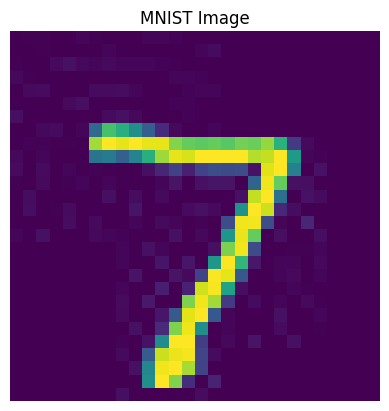

Taille du tenseur: torch.Size([1, 28, 28])


In [22]:
# lire l'image et la convertir en tenseur
image = Image. open ('mnist_image.jpg')
transform = transforms. ToTensor()
img_tensor = transform(image)

# Afficher l'image
plt.imshow(img_tensor.permute(1, 2, 0))  # Permutation des dimensions pour matplotlib differnte des dimensions PyTorch
plt.title('MNIST Image')
plt.axis('off')  # Désactiver les axes
plt.show()

# Visualisation de la taille du tenseur
print("Taille du tenseur:", img_tensor.size())

In [23]:
# Visualisation du tensor
#print (img_tensor)



# 2. Strides et Padding

In [24]:
import torch
import torch.nn as nn

# Fixer la seed pour la reproductibilité
torch.manual_seed(0)

# Supposons une entrée avec une taille de 5x5x4 et 64 filtres de taille 3x3x4
input_size = 5
kernel_size = 3
in_channels = 4  # spécifier le nombre de canaux d'entrée
out_channels = 64  # spécifier le nombre de filtres distincts
stride_value = 2   # spécifier la valeur du stride

# Créer des données d'entrée (exemple Jouet random)
batch_size = 1
input_data = torch.randn(batch_size, in_channels, input_size, input_size)

# Créer une couche de convolution avec un padding "same padding"
# Il faut calculer le padding manuellement pour maintenir la taille de l'entrée
same_padding = (kernel_size - 1) // 2
conv_same_padding = nn.Conv2d(in_channels, out_channels, kernel_size, padding=same_padding, stride=1)

# Créer une couche de convolution avec "Custom padding" et un stride de 2
padding_value = 2  # padding personnalisé
conv_custom_padding = nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding_value, stride=stride_value)

# Créer une couche de convolution sans padding et un stride de 2
conv_no_padding = nn.Conv2d(in_channels, out_channels, kernel_size, padding=0, stride=stride_value)

# Créer une couche de convolution avec un padding "full padding" et un stride de 2
full_padding = kernel_size - 1
conv_full_padding = nn.Conv2d(in_channels, out_channels, kernel_size, padding=full_padding, stride=stride_value)

# Passer les données à travers les couches de convolution
output_same_padding = conv_same_padding(input_data)
output_custom_padding = conv_custom_padding(input_data)
output_no_padding = conv_no_padding(input_data)
output_full_padding = conv_full_padding(input_data)

# Vérifier les formes des sorties
print("Output shape (same padding):", output_same_padding.shape)
print("Output shape (custom padding):", output_custom_padding.shape)
print("Output shape (no padding):", output_no_padding.shape)
print("Output shape (full padding):", output_full_padding.shape)

# Accéder aux valeurs de la carte des caractéristiques (feature maps) par exemple pour le filtre 8 et les afficher
filter_8_output = output_same_padding[:, 8, :, :]
print("Filter 8 Feature Map Output:")
print(filter_8_output)

Output shape (same padding): torch.Size([1, 64, 5, 5])
Output shape (custom padding): torch.Size([1, 64, 4, 4])
Output shape (no padding): torch.Size([1, 64, 2, 2])
Output shape (full padding): torch.Size([1, 64, 4, 4])
Filter 8 Feature Map Output:
tensor([[[-0.1184, -0.0673, -0.3228,  0.0639, -0.3086],
         [-0.0066, -0.3291,  0.2996, -1.1613, -0.1526],
         [-0.3468, -0.0981,  1.4868, -0.7511,  0.6180],
         [-1.0000,  0.2351,  0.3197, -0.8226,  0.0204],
         [-0.2330,  0.5091,  0.4908,  0.3563,  0.4672]]],
       grad_fn=<SliceBackward0>)


# 3. CNN

Importation des modules


In [25]:
import torch
import torch.nn as nn

## 3.1. Initialisation Gloriot

**Initialisation Glorot**.  La fonction ` def init_weights_glorot(m)` est une fonction utilisée pour initialiser les poids  de manière à maintenir des gradients stables lors de la rétropropagation dans les réseaux de neurones. `m` représente un module de réseau de neurones.

- `if isinstance(m, nn.Conv2d)`  vérifie si le module `m` est une couche de convolution.
- `elif isinstance(m, nn.Linear)` vérifie si le module `m` est une couche linéaire.
- `if m.bias is not None`  vérifie si la couche a un biais.
- `nn.init.xavier_uniform_(m.weight.data)` initialise les poids du module `m` en utilisant la  fonction `xavier_uniform_` du module `nn.init` de PyTorch. Les poids sont accessibles via `m.weight.data`.
- `nn.init.zeros_(m.bias.data)` initialise les biais à zéro en utilisant la fonction `zeros_` du module `nn.init` de PyTorch. Les biais sont accessibles via `m.bias.data`.




In [26]:
# Initialisation Glorot (Xavier)
def init_weights_glorot(m):
    if isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight.data)
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)

## 3.2. Initialisation He

**Initialisation HE**.  La fonction `def init_weights_he(m)` est une fonction utilisée pour initialiser les poids  avec la méthode He. `m` représente un module de réseau de neurones.

- `if isinstance(m, nn.Conv2d)`  vérifie si le module `m` est une couche de convolution.
- `elif isinstance(m, nn.Linear)` vérifie si le module `m` est une couche linéaire.
- `if m.bias is not None`  vérifie si la couche a un biais.
- `nn.init.kaiming_uniform_(m.weight.data, nonlinearity='relu')` initialise les poids du module `m` en utilisant la  fonction `nn.init.kaiming_uniform_` du module `nn.init` de PyTorch. Cette fonction prend en compte la non-linéarité de la fonction d'activation. Les poids sont accessibles via `m.weight.data`.
- `nn.init.zeros_(m.bias.data)` initialise les biais à zéro en utilisant la fonction `zeros_` du module `nn.init` de PyTorch. Les biais sont accessibles via `m.bias.data`.



In [30]:
# Initialisation He
def init_weights_he(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_uniform_(m.weight.data, nonlinearity='relu')
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)
    elif isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight.data, nonlinearity='relu')
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)

## 3.3. Création de la classe `CNN`


**Importons les modules nécessaires de PyTorch et définissons une classe CNN.**

Construisons notre modèle CNN avec deux couches de convolution (`conv1` et `conv2`) suivies de deux couches entièrement connectées (`fc1` et `fc2`) à l'aide d'une classe.


Le code  ci-dessous définit une classe `CNN` (cf section 3.3.2.) en utilisant le module `nn.Module` de PyTorch. Cette classe représente un réseau de neurones convolutionnel (CNN) simple avec deux couches de convolution et deux couches entièrement connectées où

- `class CNN(nn.Module)` définit une nouvelle classe appelée `CNN` qui hérite de `nn.Module`.
- `def __init__(self)` définit la méthode d'initialisation de la classe `CNN`.
- `super(CNN, self).__init__()` appelle la méthode d'initialisation de la classe parente `nn.Module`.
- `def forward(self, x)`  définit la méthode `forward` qui spécifie comment les données sont propagées à travers le réseau.
- `return x` renvoie la sortie finale du réseau.

In [39]:
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, h, w, c):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=c, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * (h//4) * (w//4), 512)  # Utilisation de la taille de sortie après deux max pooling
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 32 * (x.size(2)//4) * (x.size(3)//4))  # Calcul de la taille de l'entrée pour la couche linéaire
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)  # Appliquer le softmax sur les logits
        return x


### 3.3.1. Précision sur le code

Plus précisément, dans ce code, les commandes sont exécutées dans l'ordre ci-dessous

1. **Convolution et Pooling avec `self.conv1`** :
   - `self.conv1 = nn.Conv2d(in_channels=c, out_channels=16, kernel_size=3, stride=1, padding=1)` Définition de la couche de convolution `self.conv1`.
   - `x = F.relu(self.conv1(x))` Application de la convolution à l'entrée `x` en utilisant `self.conv1(x)` et activation avec ReLU à la sortie de la convolution.
   - `x = F.max_pool2d(x, kernel_size=2, stride=2)` Application d' un max pooling 2x2 et un stride de 2.
    
2. **Convolution et Pooling avec `self.conv2`** :
   - `self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)` Définition de la couche de convolution  `self.conv2`.
   - `x = F.relu(self.conv2(x))` Application de la convolution à l'entrée `x` en utilisant `self.conv2(x)` et activation avec ReLU à la sortie de la convolution.
   -  `x = F.max_pool2d(x, kernel_size=2, stride=2)` Application d un max pooling 2x2 et un stride de 2.

3. **Mise à plat des caractéristiques** :
   - `x = x.view(-1, 32 * (x.size(2)//4) * (x.size(3)//4))` Utilisation de  `x.view()` pour aplatir les caractéristiques en ajustant la taille de la sortie précédente pour être compatible avec les couches entièrement connectées.    
   
   
4. **Couches entièrement connectées** :
   - `self.fc1 = nn.Linear(32 * (h//4) * (w//4), 512)` Définition de la couche entièrement connectée `self.fc1` avec la taille de l'entrée spécifiée.
   - `x = F.relu(self.fc1(x))` Application de la couche entièrement connectée à l'entrée `x` en utilisant `self.fc1(x)` et activation avec ReLU à la sortie de la convolution.
   - `self.fc2 = nn.Linear(512, 10)` Définition de la couche entièrement connectée `self.fc2` avec la taille de l'entrée et la taille de sortie spécifiée pour la classification finale.   
   - `x = self.fc2(x)` Application de la couche entièrement connectée à l'entrée `x` en utilisant `self.fc2(x)`.
   - `x = F.softmax(x, dim=1)` Application d'un Softmax.

### 3.3.2. Définition d'une classe en Python

 En programmation orientée objet (POO), une classe est une structure fondamentale qui regroupe des données et des méthodes agissant sur ces données. La classe `CNN` représente une architecture spécifique de réseau de neurones utilisée pour des tâches telles que la classification d'images.

Les données associées à une classe sont appelées des **attributs**. Dans notre classe `CNN`, les attributs incluent différentes couches du réseau, telles que les couches de convolution (`self.conv1`, `self.conv2`), les couches entièrement connectées (`self.fc1`, `self.fc2`), etc. Ces attributs contiennent les paramètres (poids et biais) appris lors de l'entraînement du réseau.

Les classes contiennent des **méthodes** qui opèrent sur les données de la classe. Dans la classe `CNN`, la méthode principale est `forward(self, x)`. Cette méthode définit comment les données sont propagées à travers le réseau. Notre classe spécifie également les opérations à effectuer sur les données à chaque couche du réseau, y compris les opérations de convolution, de pooling et les opérations linéaires.

Les classes offrent un mécanisme d'**encapsulation**, permettant de regrouper les données et les méthodes qui agissent sur ces données dans une seule entité, la classe. Dans notre exemple, les différentes couches, les fonctions d'activation et les opérations sont encapsulées dans la classe `CNN`, facilitant ainsi la gestion et la manipulation du réseau.

Une classe peut **hériter** des attributs et des méthodes d'une autre classe, ce qui permet d'étendre et de spécialiser les fonctionnalités. Le mécanisme d'héritage favorise la réutilisabilité du code et la hiérarchie de classes. Notre classe `CNN` hérite de la classe `nn.Module`, une classe de base dans la bibliothèque PyTorch. La classe `nn.Module` est essentielle pour la construction de réseaux de neurones et fournit de nombreuses fonctionnalités utiles pour la gestion des paramètres, la propagation avant, et d'autres aspects de l'entraînement et de l'évaluation des modèles.


## 3.4. Création d'une instance du modèle CNN

Création d'une instance du modèle CNN  et application de l'initialisation Glorot (Xavier) à ses poids à l'aide de la méthode `apply()`.

In [ ]:
# Par exemple pour une entrée de taille
h=32
w=32
c=3

model_glorot = CNN(h,w,c)
model_glorot.apply(init_weights_glorot)


CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

Création d'une autre instance du modèle CNN et application de l'initialisation He à ses poids à l'aide de la méthode `apply()`.

In [ ]:
# Par exemple pour une entrée de taille
h=28
w=28
c=1


model_he = CNN(h,w,c)
model_he.apply(init_weights_he)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

# 4. Entrainement d'un CNN :exemple

Importation des modules nécessaires

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F

Définition de la transformation des données

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir les images PIL en tensors
    transforms.Normalize((0.5,), (0.5,))  # Normaliser les valeurs des pixels entre -1 et 1
])


Chargement des données MNIST

In [7]:
mnist_dataset = MNIST(root='./data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 79108653.84it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 38033184.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27427252.38it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2869487.69it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Division des données en ensembles d'entraînement, de validation et de test

In [8]:
train_size = int(0.8 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

Création des DataLoader pour charger les données en lots pendant l'entraînement

In [9]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

Définition de la classe CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 512)  # La taille de l'entrée est de 7x7 après deux max pooling
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 32 * 7 * 7)  # Aplatir les caractéristiques pour les couches entièrement connectées
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Initialisation Glorot (Xavier)

In [11]:
def init_weights_glorot(m):
    if isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight.data)
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        if m.bias is not None:
            nn.init.zeros_(m.bias.data)

Création du modèle et initialisation des poids

In [12]:
model = CNN()
model.apply(init_weights_glorot)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

Définition de la fonction de perte et de l'optimiseur

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Entraînement du modèle

In [14]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/10], Loss: 0.1842
Epoch [2/10], Loss: 0.0514
Epoch [3/10], Loss: 0.0351
Epoch [4/10], Loss: 0.0235
Epoch [5/10], Loss: 0.0181
Epoch [6/10], Loss: 0.0139
Epoch [7/10], Loss: 0.0118
Epoch [8/10], Loss: 0.0098
Epoch [9/10], Loss: 0.0095
Epoch [10/10], Loss: 0.0051


Évaluation du modèle sur l'ensemble de validation

In [15]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy on validation set: {accuracy:.4f}')


Accuracy on validation set: 0.9909
